{'accuracy': 0.831,
 'precision': 0.835,
 'recall': 0.83,
 'f1': 0.832,
 'auc': 0.905}

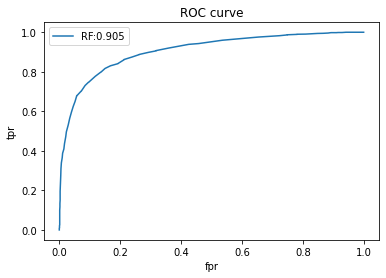

In [8]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
def knn_load_data(poly_name,file_dir='../data/'):
    file_path_pos = file_dir+poly_name+'.txt'
    file_path_neg = file_dir+'neg'+poly_name+'.txt'
    base2num={
    'A':0,'T':1,'C':2,'G':3,
    'a':0,'t':1,'c':2,'g':3
    }
    
    pdata = np.loadtxt(file_path_pos,dtype='str')
    pdata = [seq[:100]+seq[106:] for seq in pdata]
    pdata = [[base2num[base] for base in seq] for seq in pdata]
                   
    ndata = np.loadtxt(file_path_neg,dtype='str')
    ndata = [seq[:100]+seq[106:] for seq in ndata]
    ndata = [[base2num[base] for base in seq] for seq in ndata]
    
    X = np.array(pdata+ndata)
    y = np.append(np.ones(len(pdata)),np.zeros(len(ndata)))
    
    return X,y

def model_assess(y_true,y_prob,roc=True,pr=False,poly_name=None,line_name=None):
    '''
    pass
    '''
    re={}
    y_true = np.array(y_true,dtype=int)
    y_pred = np.array(y_prob+0.5,dtype=int)
    
    re['accuracy'] = round(metrics.accuracy_score  (y_true,y_pred),3)
    re['precision'] = round(metrics.precision_score(y_true,y_pred),3)
    re['recall'] = round(metrics.recall_score      (y_true,y_pred),3)
    re['f1'] =  round(metrics.f1_score             (y_true,y_pred),3)
    re['auc'] = round(metrics.roc_auc_score        (y_true, y_prob),3)
    
    
    fpr,tpr,thresholds = metrics.roc_curve(y_true,y_prob)
    plt.plot(fpr,tpr,label= 'RF:'+str(re['auc']))
    plt.title('ROC curve')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    
    #precision, recall, thresholds = metrics.precision_recall_curve(y_true,y_prob)
    #plt.plot(precision,recall,label='precison_and_recall')
    plt.legend()
    
    return re

#load and split all data
polys="AATAGA AATATA CATAAA GATAAA AGTAAA ACTAAA TATAAA AATACA AAAAAG AAGAAA ATTAAA AATAAA".split(" ")
X,y=[],[]
for index,poly in enumerate(polys):
    X_sub,y_sub = knn_load_data(poly)
    if(index == 0):
        X,y = X_sub,y_sub
    else:
        X,y = np.concatenate((X,X_sub)),np.concatenate((y,y_sub))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)


#build and train model
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=100,
                                oob_score=True,
                                random_state=22,
                                n_jobs=-1)
RF_clf.fit(X_train,y_train)
pred_prob = RF_clf.predict_proba(X_test)[:,1]
model_assess(y_test,pred_prob)

{'accuracy': 0.757, 'precision': 0.757, 'recall': 0.757, 'f1': 0.757, 'auc': 0.861}
{'accuracy': 0.805, 'precision': 0.825, 'recall': 0.786, 'f1': 0.805, 'auc': 0.859}
{'accuracy': 0.659, 'precision': 0.652, 'recall': 0.714, 'f1': 0.682, 'auc': 0.674}
{'accuracy': 0.793, 'precision': 0.789, 'recall': 0.732, 'f1': 0.759, 'auc': 0.855}
{'accuracy': 0.687, 'precision': 0.719, 'recall': 0.657, 'f1': 0.687, 'auc': 0.776}
{'accuracy': 0.797, 'precision': 0.873, 'recall': 0.696, 'f1': 0.774, 'auc': 0.872}
{'accuracy': 0.75, 'precision': 0.855, 'recall': 0.67, 'f1': 0.752, 'auc': 0.833}
{'accuracy': 0.778, 'precision': 0.871, 'recall': 0.67, 'f1': 0.758, 'auc': 0.857}
{'accuracy': 0.89, 'precision': 0.874, 'recall': 0.91, 'f1': 0.892, 'auc': 0.963}
{'accuracy': 0.82, 'precision': 0.863, 'recall': 0.777, 'f1': 0.818, 'auc': 0.892}
{'accuracy': 0.817, 'precision': 0.843, 'recall': 0.789, 'f1': 0.815, 'auc': 0.895}
{'accuracy': 0.746, 'precision': 0.743, 'recall': 0.74, 'f1': 0.741, 'auc': 0.82}


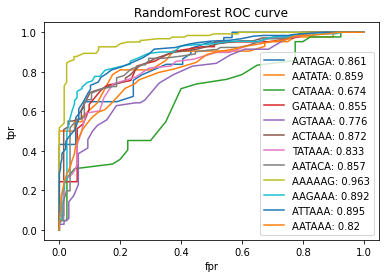

In [1]:
#train and test for 12 polys
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
def knn_load_data(poly_name,file_dir='../data/'):
    file_path_pos = file_dir+poly_name+'.txt'
    file_path_neg = file_dir+'neg'+poly_name+'.txt'
    base2num={
    'A':0,'T':1,'C':2,'G':3,
    'a':0,'t':1,'c':2,'g':3
    }
    
    pdata = np.loadtxt(file_path_pos,dtype='str')
    pdata = [seq[:100]+seq[106:] for seq in pdata]
    pdata = [[base2num[base] for base in seq] for seq in pdata]
                   
    ndata = np.loadtxt(file_path_neg,dtype='str')
    ndata = [seq[:100]+seq[106:] for seq in ndata]
    ndata = [[base2num[base] for base in seq] for seq in ndata]
    
    X = np.array(pdata+ndata)
    y = np.append(np.ones(len(pdata)),np.zeros(len(ndata)))
    
    return X,y

def model_assess(y_true,y_prob,roc=True,pr=False,poly_name=None,line_name=None):
    '''
    pass
    '''
    re={}
    y_true = np.array(y_true,dtype=int)
    y_pred = np.array(y_prob+0.5,dtype=int)
    
    re['accuracy'] = round(metrics.accuracy_score  (y_true,y_pred),3)
    re['precision'] = round(metrics.precision_score(y_true,y_pred),3)
    re['recall'] = round(metrics.recall_score      (y_true,y_pred),3)
    re['f1'] =  round(metrics.f1_score             (y_true,y_pred),3)
    re['auc'] = round(metrics.roc_auc_score        (y_true, y_prob),3)
    

    fpr,tpr,thresholds = metrics.roc_curve(y_true,y_prob)
    plt.plot(fpr,tpr,label= poly_name+': '+str(re['auc']))
    plt.title('RandomForest ROC curve')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.legend()
    #precision, recall, thresholds = metrics.precision_recall_curve(y_true,y_prob)
    #plt.plot(precision,recall,label='precison_and_recall')
    
    return re

#load and split all data
polys="AATAGA AATATA CATAAA GATAAA AGTAAA ACTAAA TATAAA AATACA AAAAAG AAGAAA ATTAAA AATAAA".split(" ")
X,y=[],[]
for index,poly in enumerate(polys):
    X,y = knn_load_data(poly)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)


    #build and train model
    from sklearn.ensemble import RandomForestClassifier
    RF_clf = RandomForestClassifier(n_estimators=100,
                                    oob_score=True,
                                    random_state=22,
                                    n_jobs=-1)
    RF_clf.fit(X_train,y_train)
    pred_prob = RF_clf.predict_proba(X_test)[:,1]
    print(model_assess(y_test,pred_prob,poly_name=poly))